In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(42000, 785)
<class 'numpy.ndarray'>
(42000, 784) (42000,)
33600
(33600, 784) (33600,)
(8400, 784) (8400,)


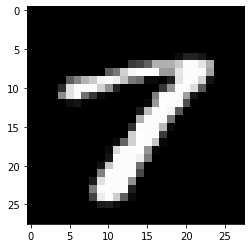

7


In [8]:
#Visualise SOme Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[3000])
print(Y_train[3000])

In [11]:
def distance(p1,p2):
    #print(type(p2))
    return np.sqrt(sum((p1-p2)**2))

def KNN(x,y,query,k=20):
    #print(k)
    dist_list = []
    for i in range(x.shape[0]):
        d = distance(query,x[i])
        dist_list.append((d,y[i]))
    #dist_list = np.array(dist_list)
    dist_list = sorted(dist_list)
    #print(dist_list)
    dist_list = np.array(dist_list)
    k_nearest_neighbours = dist_list[:k]
    #print(k_nearest_neighbours)
    result = np.unique(k_nearest_neighbours[:,1],return_counts=True)
    #print(result)
    index = result[1].argmax()
    pred = result[0][index]
    return pred

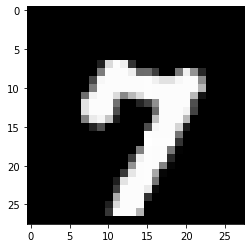

7


In [13]:
pred = KNN(X_train,Y_train,X_test[1])
drawImg(X_test[1])
print(int(pred))

In [20]:
def get_accuracy(x_train,y_train,x_test,y_test):
    correct = 0
    for i in range(x_test.shape[0]):
        pred = KNN(x_train,y_train,x_test[i])
        drawImg(x_test[i])
        print(str(i+1)+'Image: Predicted:'+str(int(pred))+' Actual: '+str(y_test[i]))
        if y_test[i]==int(pred):
            correct += 1
    return correct/x_test.shape[0]

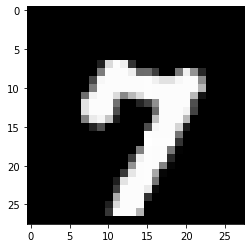

7


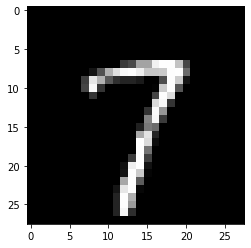

7


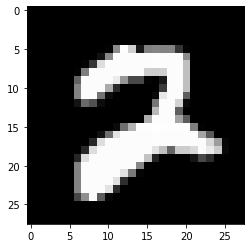

2


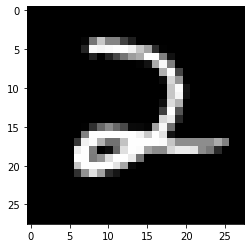

2


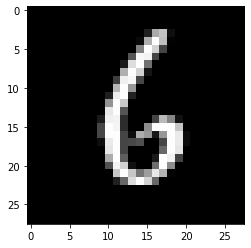

6


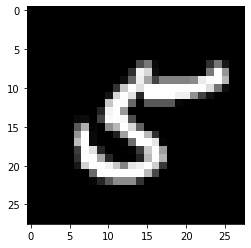

5


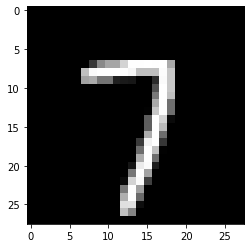

7


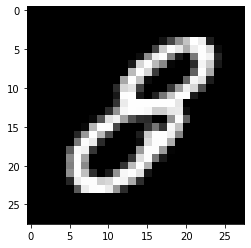

8


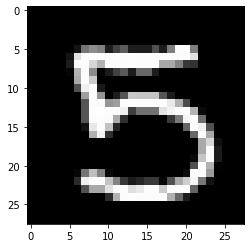

5


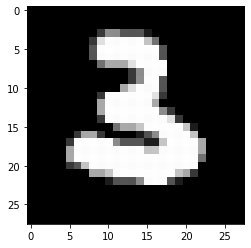

3


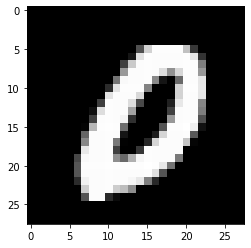

0


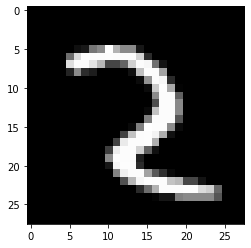

2


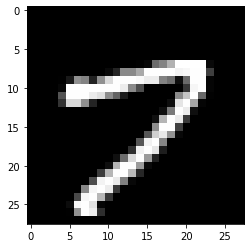

7


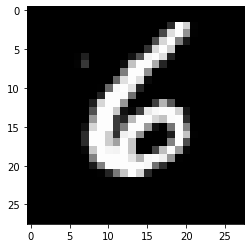

6


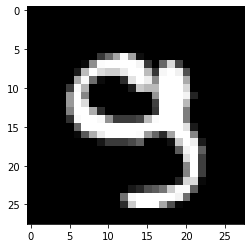

9


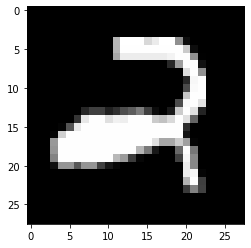

2


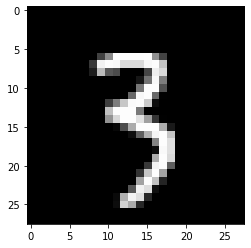

3


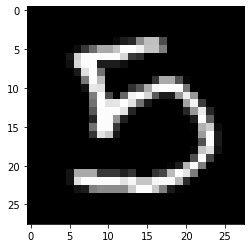

5


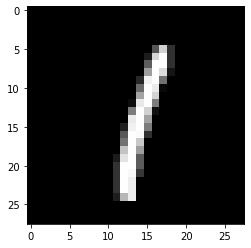

1


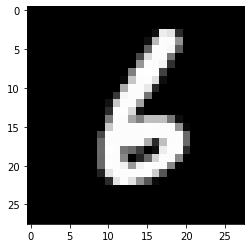

6


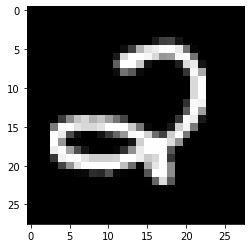

2


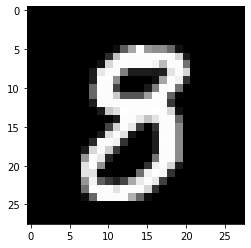

8


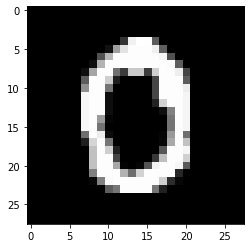

0


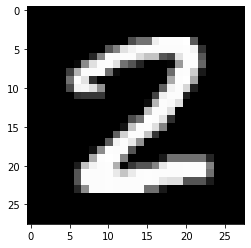

2


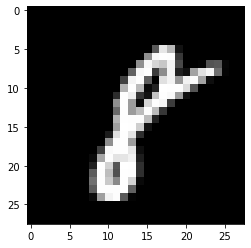

8


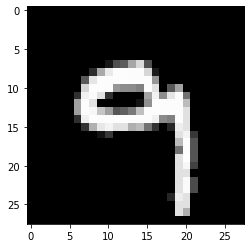

9


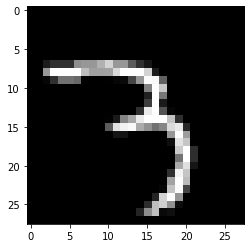

7


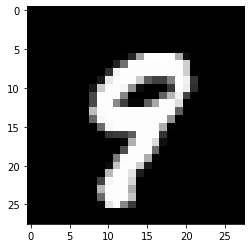

9


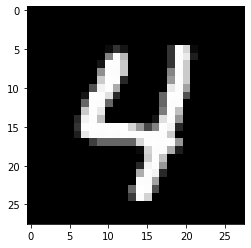

4


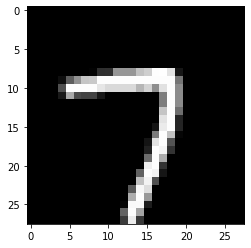

7


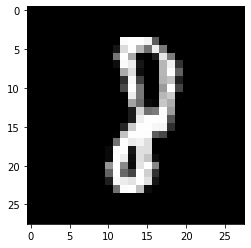

8


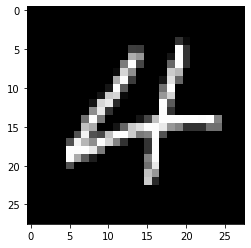

4


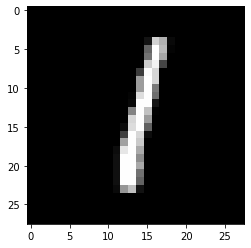

1


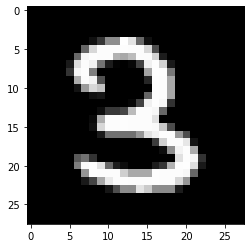

3


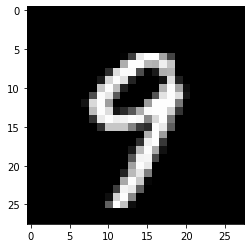

9


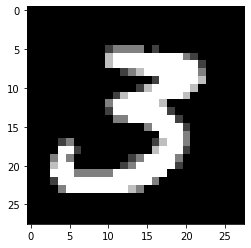

3


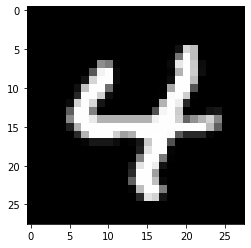

4


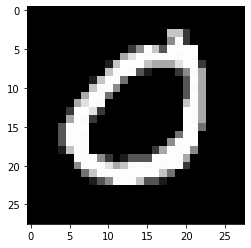

0


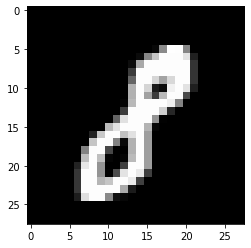

8


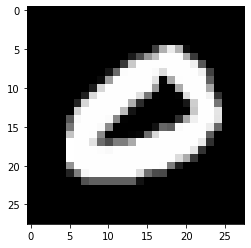

0


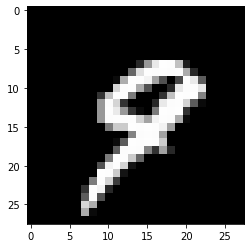

9


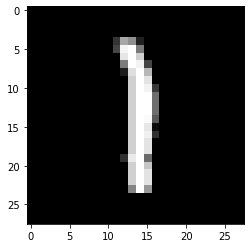

1


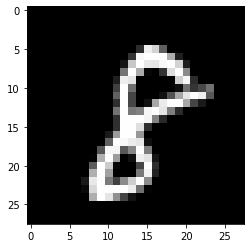

8


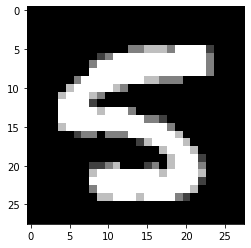

5


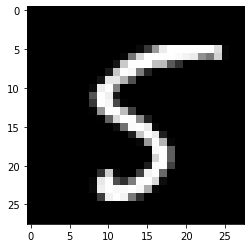

5


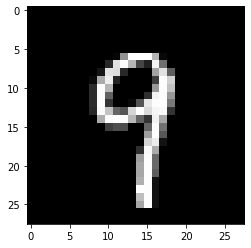

9


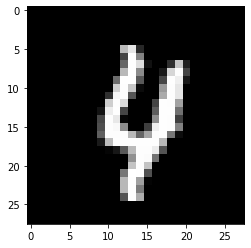

4


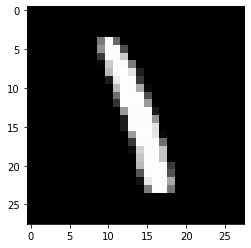

1


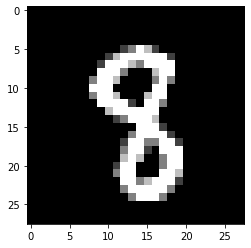

8


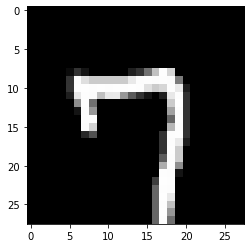

7


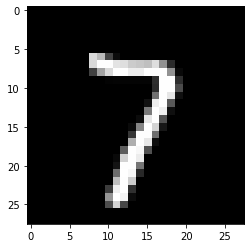

7


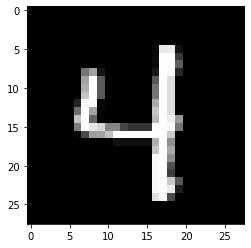

4


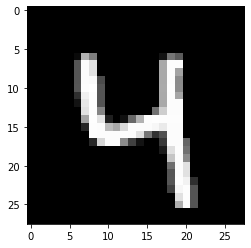

4


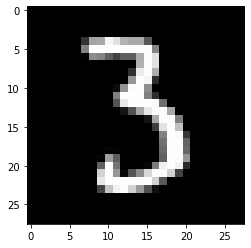

3


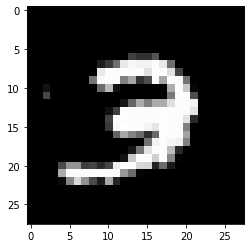

3


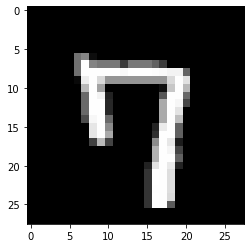

7


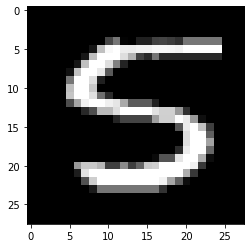

5


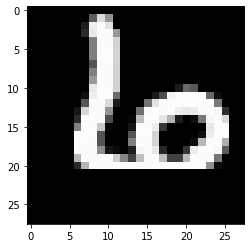

6


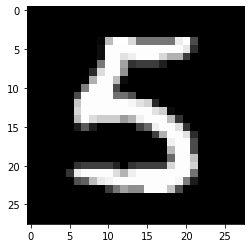

5


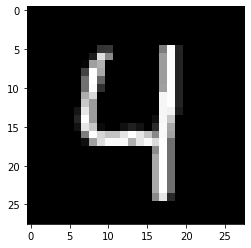

4


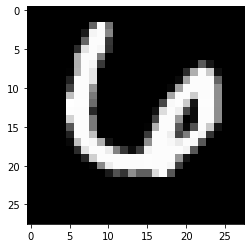

6


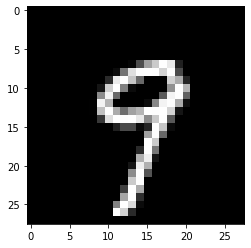

9


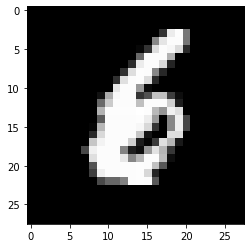

6


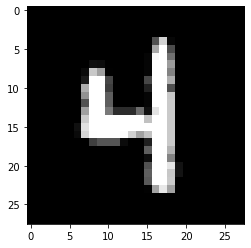

4


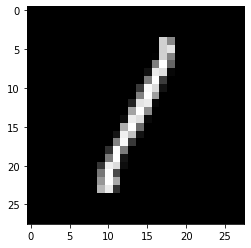

1


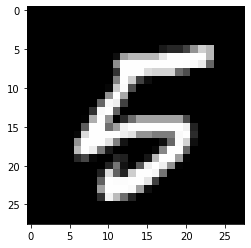

5


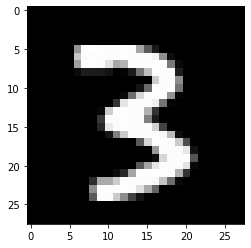

3


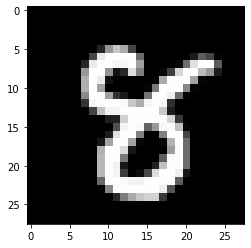

8


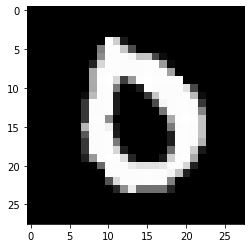

0


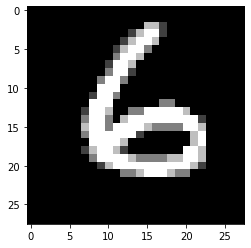

6


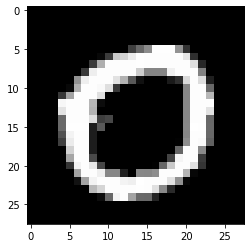

0


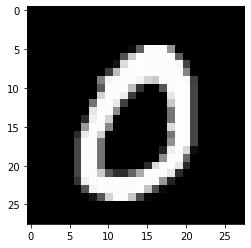

0


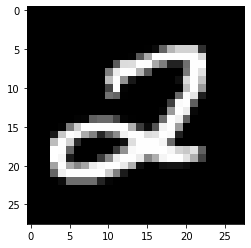

2


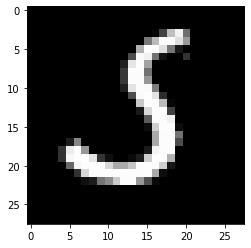

5


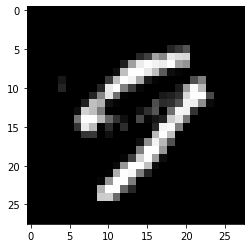

9


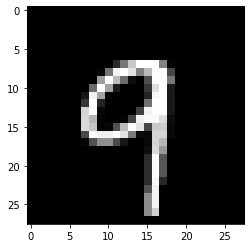

9


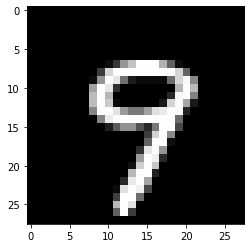

9


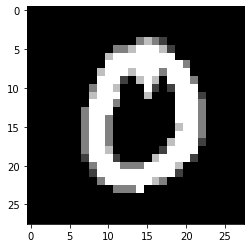

0


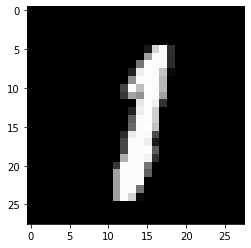

1


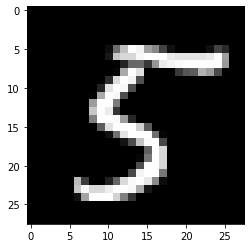

5


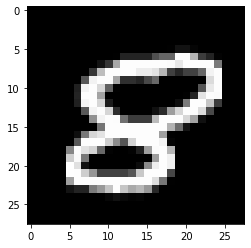

8


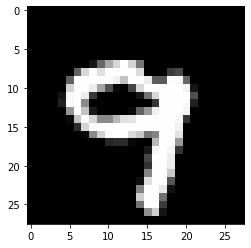

9


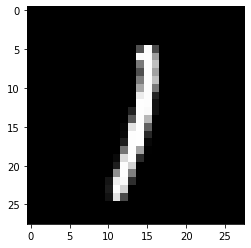

1


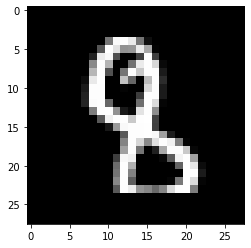

8


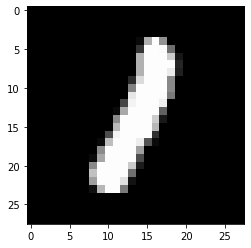

1


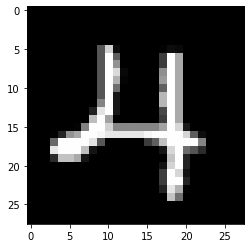

4


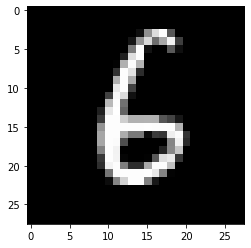

6


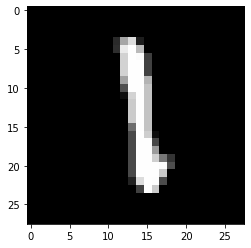

1


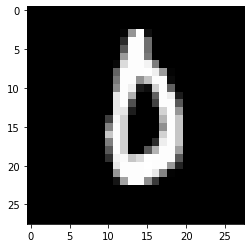

0


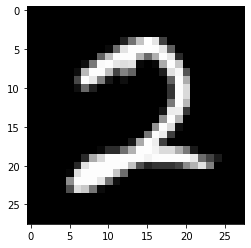

2


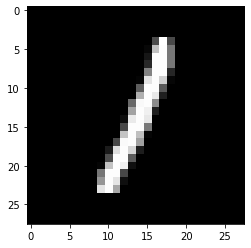

1


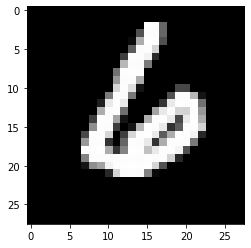

6


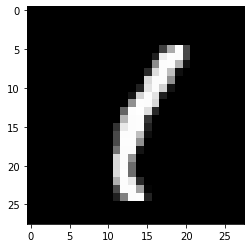

1


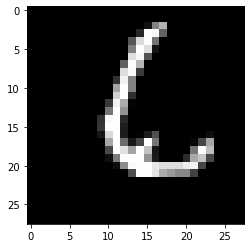

6


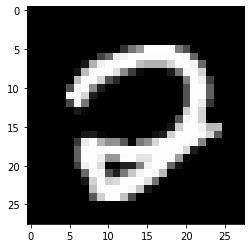

0


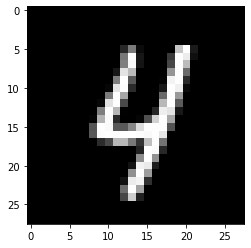

4


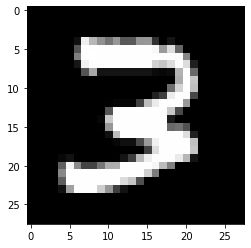

3


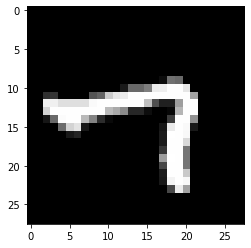

7


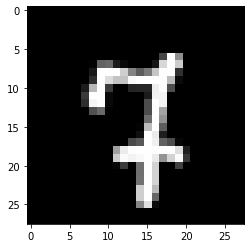

7


0.9797979797979798

In [22]:
get_accuracy(X_train,Y_train,X_test[1:100],Y_test[1:100])
